<a href="https://colab.research.google.com/github/thanhcdt1820/BT2_AI/blob/main/BT2_TanThanh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 14.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=a85a3ba2c2de1338bd20f9d103f9e23d245c0a957ebad81b8fac293d120025cc
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


90.97222222222224


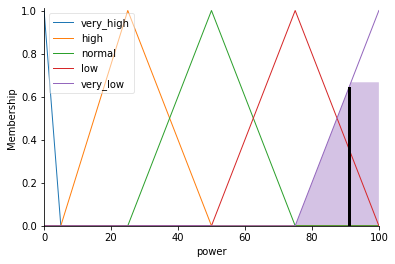

In [2]:
import numpy as np 
import skfuzzy as fuzz 
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

rice = ctrl.Antecedent(np.arange(100,1001,1),'rice')
time = ctrl.Antecedent(np.arange(20,180,1),'time')
power = ctrl.Consequent(np.arange(0,101,1),'power')

rice['very_fast']= fuzz.trimf(rice.universe,[0,0,300])
rice['fast'] = fuzz.trimf(rice.universe,[100,300,500])
rice['normal'] = fuzz.trimf(rice.universe,[300,500,800])
rice['slow'] = fuzz.trimf(rice.universe,[600,800,1000])
rice['very_slow'] = fuzz.trimf(rice.universe,[800,1000,1000])

time['very_fast']= fuzz.trimf(time.universe,[0,0,50])
time['fast'] = fuzz.trimf(time.universe,[20,50,90])
time['normal'] = fuzz.trimf(time.universe,[50,90,130])
time['slow'] = fuzz.trimf(time.universe,[90,130,180])
time['very_slow'] = fuzz.trimf(time.universe,[130,180,180])

power['very_high']= fuzz.trimf(power.universe,[0,0,5])
power['high'] = fuzz.trimf(power.universe,[5,25,50])
power['normal'] = fuzz.trimf(power.universe,[25,50,75])
power['low'] = fuzz.trimf(power.universe,[50,75,100])
power['very_low'] = fuzz.trimf(power.universe,[75,100,100])


rule1 = ctrl.Rule(rice['very_fast']&time['very_fast'],power['high'])
rule2 = ctrl.Rule(rice['very_fast']&time['fast'],power['high'])
rule3 = ctrl.Rule(rice['very_fast']&time['normal'],power['low'])
rule4 = ctrl.Rule(rice['very_fast']&time['slow'],power['very_low'])
rule5 = ctrl.Rule(rice['very_fast']&time['very_slow'],power['very_low'])
rule6 = ctrl.Rule(rice['fast']&time['very_fast'],power['high'])
rule7 = ctrl.Rule(rice['fast']&time['fast'],power['high'])
rule8 = ctrl.Rule(rice['fast']&time['normal'],power['low'])
rule9 = ctrl.Rule(rice['fast']&time['slow'],power['low'])
rule10 = ctrl.Rule(rice['fast']&time['very_slow'],power['very_low'])
rule11 = ctrl.Rule(rice['normal']&time['very_fast'],power['very_high'])
rule12 = ctrl.Rule(rice['normal']&time['fast'],power['very_high'])
rule13 = ctrl.Rule(rice['normal']&time['normal'],power['normal'])
rule14 = ctrl.Rule(rice['normal']&time['slow'],power['low'])
rule15 = ctrl.Rule(rice['normal']&time['very_slow'],power['low'])
rule16 = ctrl.Rule(rice['slow']&time['very_fast'],power['very_high'])
rule17 = ctrl.Rule(rice['slow']&time['fast'],power['very_high'])
rule18 = ctrl.Rule(rice['slow']&time['normal'],power['high'])
rule19 = ctrl.Rule(rice['slow']&time['slow'],power['low'])
rule20 = ctrl.Rule(rice['slow']&time['very_slow'],power['low'])
rule21 = ctrl.Rule(rice['very_slow']&time['very_fast'],power['very_high'])
rule22 = ctrl.Rule(rice['very_slow']&time['fast'],power['very_high'])
rule23 = ctrl.Rule(rice['very_slow']&time['normal'],power['very_high'])
rule24 = ctrl.Rule(rice['very_slow']&time['slow'],power['high'])
rule25 = ctrl.Rule(rice['very_slow']&time['very_slow'],power['high'])


powering_ctrl=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25])
powering=ctrl.ControlSystemSimulation(powering_ctrl)
powering.input['rice']=100
powering.input['time']=130

powering.compute()
print(powering.output['power'])
power.view(sim=powering)